In [24]:
#Dependencies
 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
import itertools
import PIL

import os
import io
import numpy as np
import glob
import math

import tensorflow as tf
import keras 
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

In [25]:
model = load_model("Xception_train_b10_ep200_SGD.h5")

In [26]:
test_batch = 'images_split/test'
target_size = (299,299)
num_classes = 8
num_images = len(glob.glob('images_split/test/*/*.jpg')) 
batch_size = num_images + 1
class_names = ['animals','beaches','birds','electronics','fashion','nature','landmarks','people']

In [27]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_batches = test_datagen.flow_from_directory(
                                directory=test_batch,
                                target_size=target_size,  
                                classes=class_names,                           
                                batch_size=batch_size
                                )                                                   

Found 374 images belonging to 8 classes.


In [28]:
test_imgs, test_labels = next(test_batches)
test_imgs = np.array(test_imgs)
test_labels = np.array(test_labels)
test_labels = np.argmax(test_labels, axis=1)
 

C:\Users\rupal\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [29]:
#make predictions
predictions = model.predict(test_imgs)
predicted_labels=np.argmax(predictions, axis=1)

In [30]:
cm  = confusion_matrix (test_labels, predicted_labels)

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Classes')
    plt.xlabel('Predicted Classes')

Confusion matrix, without normalization


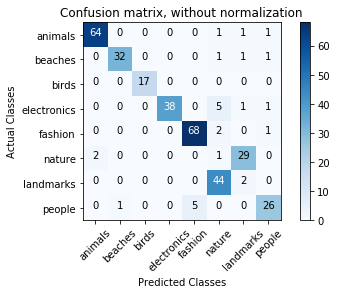

In [32]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, 
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


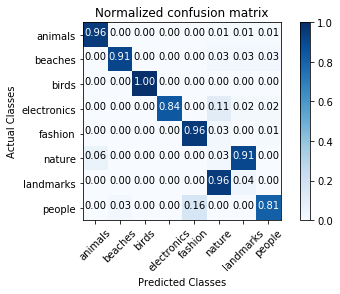

In [33]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [34]:
print('Classification Report')
print(classification_report(test_labels, predicted_labels, target_names=class_names))

Classification Report
             precision    recall  f1-score   support

    animals       0.97      0.96      0.96        67
    beaches       0.97      0.91      0.94        35
      birds       1.00      1.00      1.00        17
electronics       1.00      0.84      0.92        45
    fashion       0.93      0.96      0.94        71
     nature       0.02      0.03      0.02        32
  landmarks       0.06      0.04      0.05        46
     people       0.87      0.81      0.84        32

avg / total       0.75      0.72      0.73       345



In [35]:
print('Accuracy Score:', accuracy_score(test_labels, predicted_labels))

Accuracy Score: 0.71884057971
